# 

Exploratory analysis of the protein function prediction dataset.

In [3]:
%pip install seaborn pandas numpy matplotlib scikit-learn biopython obonet networkx
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Add project root to path
sys.path.insert(0, str(Path.cwd().parent / '05_model'))

from src.data.prepare import load_sequences, load_terms, load_taxonomy, load_ia_weights, load_go

%matplotlib inline
sns.set_style('whitegrid')

Note: you may need to restart the kernel to use updated packages.


## Load Data

In [8]:
data_root = Path(r'E:\Computational Intelligence\CIS6005_Kaggle_Project_Folder_Structure\data')
train_root = data_root / 'Train'

# Load all files
sequences = load_sequences(train_root / 'train_sequences.fasta')
terms_df = load_terms(train_root / 'train_terms.tsv')
taxonomy_df = load_taxonomy(train_root / 'train_taxonomy.tsv')
ia_weights = load_ia_weights(data_root / 'IA.tsv')
go_graph = load_go(train_root / 'go-basic.obo')

print(f"Sequences: {len(sequences):,}")
print(f"Term annotations: {len(terms_df):,}")
print(f"Taxonomy entries: {len(taxonomy_df):,}")
print(f"IA weights: {len(ia_weights):,}")
print(f"GO graph nodes: {len(go_graph.nodes):,}")

Sequences: 82,404
Term annotations: 537,028
Taxonomy entries: 82,404
IA weights: 40,122
GO graph nodes: 40,122


## Sequence Statistics

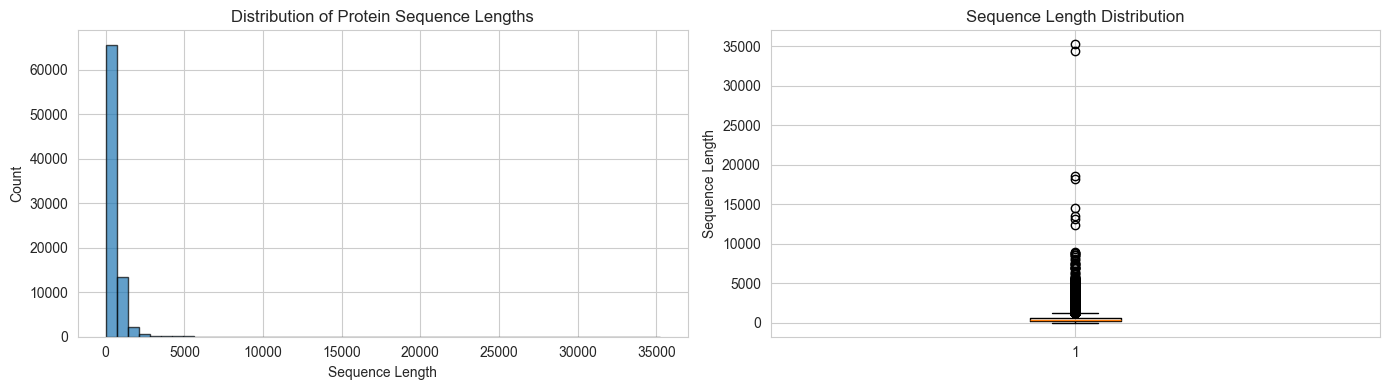

Min length: 3
Max length: 35213
Mean length: 525.8
Median length: 409.0


In [9]:
seq_lengths = [len(seq) for seq in sequences.values()]

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Histogram
axes[0].hist(seq_lengths, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Sequence Length')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Protein Sequence Lengths')

# Box plot
axes[1].boxplot(seq_lengths, vert=True)
axes[1].set_ylabel('Sequence Length')
axes[1].set_title('Sequence Length Distribution')

plt.tight_layout()
plt.show()

print(f"Min length: {min(seq_lengths)}")
print(f"Max length: {max(seq_lengths)}")
print(f"Mean length: {np.mean(seq_lengths):.1f}")
print(f"Median length: {np.median(seq_lengths):.1f}")

## Term Distribution by Ontology

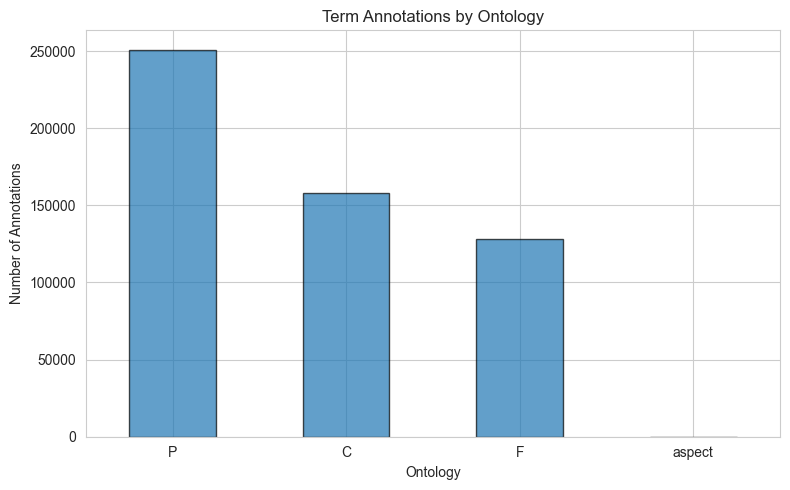


Annotations per ontology:
namespace
P         250805
C         157770
F         128452
aspect         1
Name: count, dtype: int64


In [10]:
ontology_counts = terms_df['namespace'].value_counts()

fig, ax = plt.subplots(figsize=(8, 5))
ontology_counts.plot(kind='bar', ax=ax, edgecolor='black', alpha=0.7)
ax.set_xlabel('Ontology')
ax.set_ylabel('Number of Annotations')
ax.set_title('Term Annotations by Ontology')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

print("\nAnnotations per ontology:")
print(ontology_counts)

## Terms per Protein

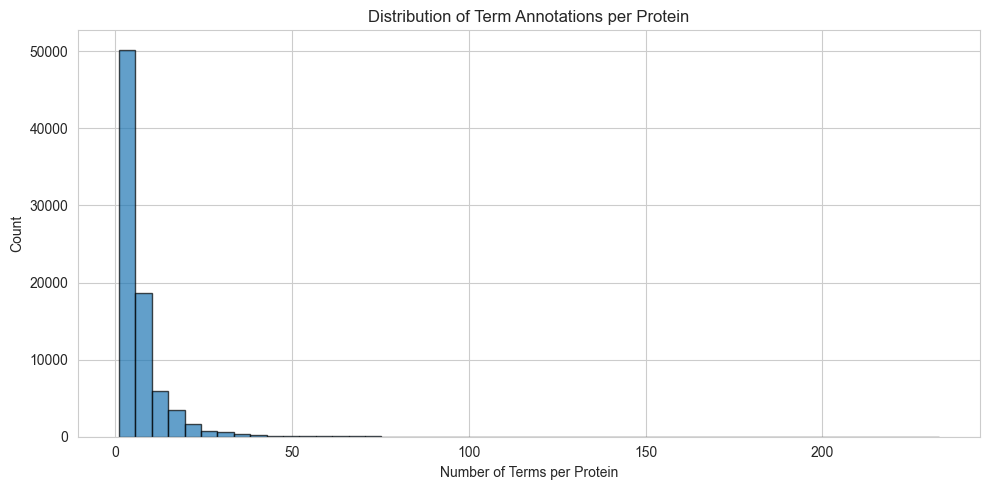

Min terms per protein: 1
Max terms per protein: 233
Mean terms per protein: 6.5
Median terms per protein: 4.0


In [11]:
terms_per_protein = terms_df.groupby('protein_id').size()

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(terms_per_protein, bins=50, edgecolor='black', alpha=0.7)
ax.set_xlabel('Number of Terms per Protein')
ax.set_ylabel('Count')
ax.set_title('Distribution of Term Annotations per Protein')
plt.tight_layout()
plt.show()

print(f"Min terms per protein: {terms_per_protein.min()}")
print(f"Max terms per protein: {terms_per_protein.max()}")
print(f"Mean terms per protein: {terms_per_protein.mean():.1f}")
print(f"Median terms per protein: {terms_per_protein.median():.1f}")

## Most Frequent Terms

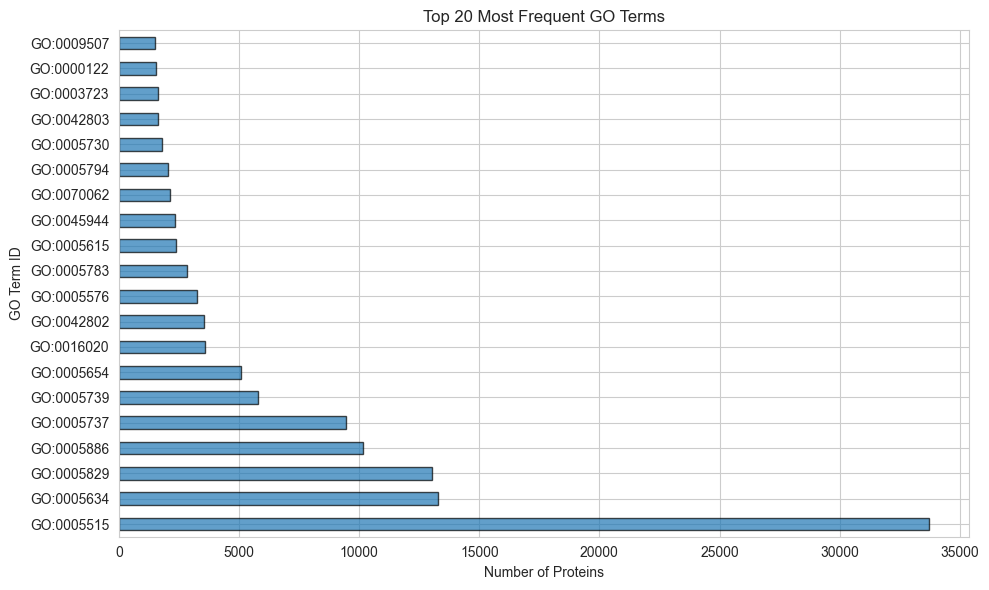


Top 10 most frequent terms:
term_id
GO:0005515    33713
GO:0005634    13283
GO:0005829    13040
GO:0005886    10150
GO:0005737     9442
GO:0005739     5807
GO:0005654     5065
GO:0016020     3563
GO:0042802     3547
GO:0005576     3241
Name: count, dtype: int64


In [12]:
top_terms = terms_df['term_id'].value_counts().head(20)

fig, ax = plt.subplots(figsize=(10, 6))
top_terms.plot(kind='barh', ax=ax, edgecolor='black', alpha=0.7)
ax.set_xlabel('Number of Proteins')
ax.set_ylabel('GO Term ID')
ax.set_title('Top 20 Most Frequent GO Terms')
plt.tight_layout()
plt.show()

print("\nTop 10 most frequent terms:")
print(top_terms.head(10))

## Information Accretion Weights

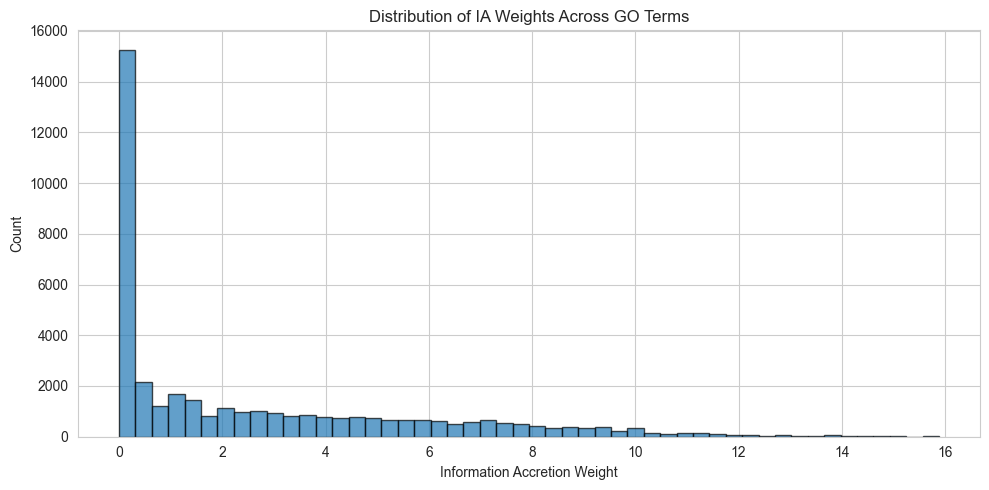

Min IA weight: 0.000
Max IA weight: 15.880
Mean IA weight: 2.647
Median IA weight: 1.202


In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(ia_weights.values, bins=50, edgecolor='black', alpha=0.7)
ax.set_xlabel('Information Accretion Weight')
ax.set_ylabel('Count')
ax.set_title('Distribution of IA Weights Across GO Terms')
plt.tight_layout()
plt.show()

print(f"Min IA weight: {ia_weights.min():.3f}")
print(f"Max IA weight: {ia_weights.max():.3f}")
print(f"Mean IA weight: {ia_weights.mean():.3f}")
print(f"Median IA weight: {ia_weights.median():.3f}")

## Taxonomy Distribution

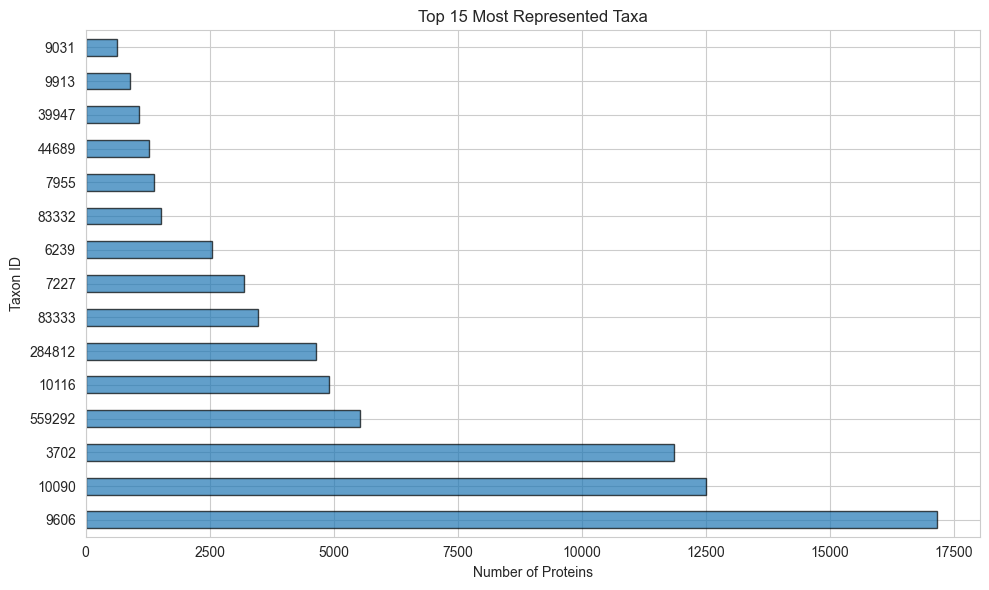


Total unique taxa: 1381

Top 10 taxa:
taxon_id
9606      17162
10090     12508
3702      11863
559292     5520
10116      4909
284812     4636
83333      3466
7227       3201
6239       2540
83332      1530
Name: count, dtype: int64


In [14]:
top_taxa = taxonomy_df['taxon_id'].value_counts().head(15)

fig, ax = plt.subplots(figsize=(10, 6))
top_taxa.plot(kind='barh', ax=ax, edgecolor='black', alpha=0.7)
ax.set_xlabel('Number of Proteins')
ax.set_ylabel('Taxon ID')
ax.set_title('Top 15 Most Represented Taxa')
plt.tight_layout()
plt.show()

print(f"\nTotal unique taxa: {taxonomy_df['taxon_id'].nunique()}")
print("\nTop 10 taxa:")
print(top_taxa.head(10))

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
DATA_DIR = r"E:\Computational Intelligence\CIS6005_Kaggle_Project_Folder_Structure\data"
print(os.listdir(DATA_DIR))

['IA.tsv', 'sample_submission.tsv', 'Test', 'Train']


In [19]:
train_terms = pd.read_csv(fr"{DATA_DIR}\Train\train_terms.tsv", sep="\t")
train_terms.columns = ["protein_id", "go_id", "ontology"]

print(train_terms.shape)
print(train_terms.head())

(537027, 3)
  protein_id       go_id ontology
0     Q5W0B1  GO:0000785        C
1     Q5W0B1  GO:0004842        F
2     Q5W0B1  GO:0051865        P
3     Q5W0B1  GO:0006275        P
4     Q5W0B1  GO:0006513        P


In [21]:
def read_fasta(path):
    seqs = {}
    with open(path, "r") as f:
        current_id = None
        parts = []
        for line in f:
            line = line.strip()
            if not line:
                continue
            if line.startswith(">"):
                if current_id is not None:
                    seqs[current_id] = "".join(parts)
                header = line[1:]
                current_id = header.split()[0]
                parts = []
            else:
                parts.append(line)
        if current_id is not None:
            seqs[current_id] = "".join(parts)
    return seqs

train_seqs = read_fasta(fr"{DATA_DIR}\Train\train_sequences.fasta")
test_seqs  = read_fasta(fr"{DATA_DIR}\Test\testsuperset.fasta")

print("Train proteins:", len(train_seqs))
print("Test proteins:", len(test_seqs))

# show 1 example
pid = list(train_seqs.keys())[0]
print("Example protein:", pid)
print("Length:", len(train_seqs[pid]))
print("First 60 amino acids:", train_seqs[pid][:60])

Train proteins: 82404
Test proteins: 224309
Example protein: sp|A0A0C5B5G6|MOTSC_HUMAN
Length: 16
First 60 amino acids: MRWQEMGYIFYPRKLR


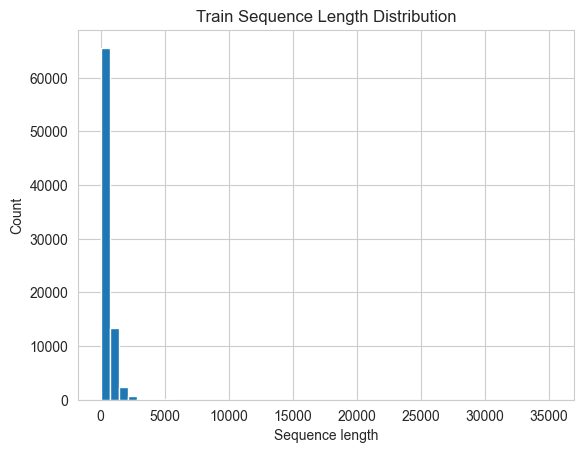

Train length stats:
min: 3 max: 35213 mean: 525.7882869763604


In [22]:
import matplotlib.pyplot as plt

train_lengths = [len(s) for s in train_seqs.values()]

plt.figure()
plt.hist(train_lengths, bins=50)
plt.title("Train Sequence Length Distribution")
plt.xlabel("Sequence length")
plt.ylabel("Count")
plt.show()

print("Train length stats:")
print("min:", min(train_lengths), "max:", max(train_lengths), "mean:", sum(train_lengths)/len(train_lengths))


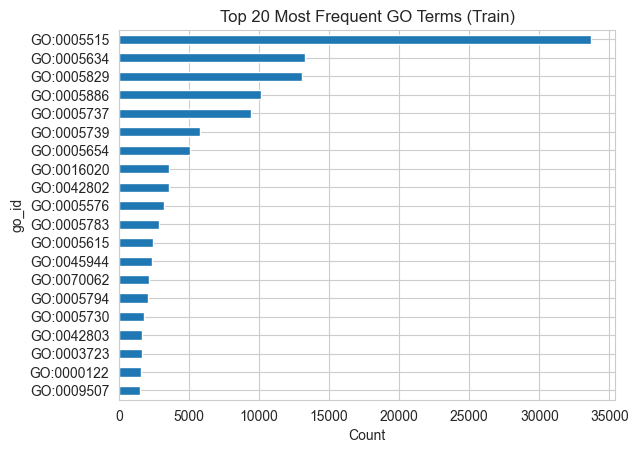

In [23]:
top_terms = train_terms["go_id"].value_counts().head(20)

plt.figure()
top_terms.sort_values().plot(kind="barh")
plt.title("Top 20 Most Frequent GO Terms (Train)")
plt.xlabel("Count")
plt.show()


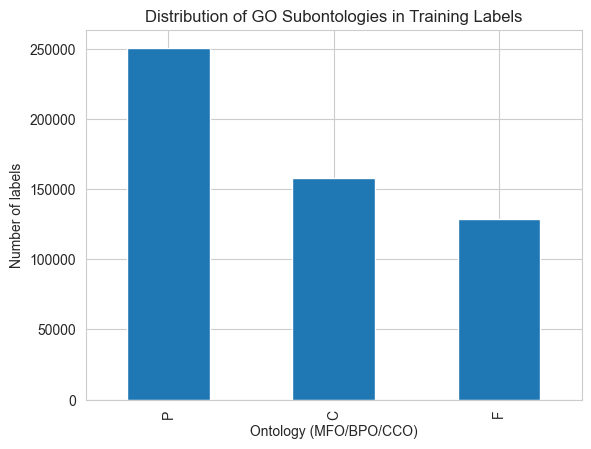

ontology
P    250805
C    157770
F    128452
Name: count, dtype: int64


In [24]:
onto_counts = train_terms["ontology"].value_counts()

plt.figure()
onto_counts.plot(kind="bar")
plt.title("Distribution of GO Subontologies in Training Labels")
plt.xlabel("Ontology (MFO/BPO/CCO)")
plt.ylabel("Number of labels")
plt.show()

print(onto_counts)


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

def kmers(sequence, k=3):
    return " ".join(sequence[i:i+k] for i in range(len(sequence) - k + 1))

train_ids = list(train_seqs.keys())
test_ids = list(test_seqs.keys())

train_text = [kmers(train_seqs[p], k=3) for p in train_ids]
test_text  = [kmers(test_seqs[p], k=3) for p in test_ids]

print("Train text samples:", len(train_text))
print("Test text samples:", len(test_text))


Train text samples: 82404
Test text samples: 224309


In [26]:
vectorizer = TfidfVectorizer(
    min_df=2,
    max_features=200000,
    ngram_range=(1, 1)
)

X_train = vectorizer.fit_transform(train_text)
X_test  = vectorizer.transform(test_text)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (82404, 8190)
X_test shape: (224309, 8190)


In [27]:
train_term_map = (
    train_terms
    .groupby("protein_id")["go_id"]
    .apply(list)
    .to_dict()
)

print("Proteins with labels:", len(train_term_map))


Proteins with labels: 82404


In [28]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from tqdm import tqdm

K = 5                    # number of nearest neighbours
MAX_TERMS = 1500         # Kaggle limit

rows = []

batch_size = 300

for start in tqdm(range(0, X_test.shape[0], batch_size)):
    end = min(start + batch_size, X_test.shape[0])
    sims = cosine_similarity(X_test[start:end], X_train)

    for i, sim_vec in enumerate(sims):
        test_pid = test_ids[start + i]
        top_idx = np.argsort(sim_vec)[-K:][::-1]
        top_sim = sim_vec[top_idx]

        score_map = {}

        for idx, sim in zip(top_idx, top_sim):
            train_pid = train_ids[idx]
            for go in train_term_map.get(train_pid, []):
                score_map[go] = max(score_map.get(go, 0), float(sim))

        if not score_map:
            continue

        sorted_terms = sorted(score_map.items(), key=lambda x: x[1], reverse=True)[:MAX_TERMS]
        max_score = sorted_terms[0][1]

        for go, sc in sorted_terms:
            prob = sc / max_score
            prob = max(0.001, min(1.0, prob))
            rows.append([test_pid, go, round(prob, 3)])

print("Total prediction rows:", len(rows))


100%|██████████| 748/748 [36:07<00:00,  2.90s/it]

Total prediction rows: 0


In [29]:
submission = pd.DataFrame(rows, columns=["protein_id", "go_id", "score"])
submission.head(10)


,protein_id,go_id,score


In [30]:
submission_path = "../submission.tsv"
submission.to_csv(submission_path, sep="\t", index=False, header=False)

print("Submission saved to:", submission_path)
print("Submission shape:", submission.shape)


Submission saved to: ../submission.tsv
Submission shape: (0, 3)


In [31]:
# How many fasta IDs overlap with label IDs?
train_term_proteins = set(train_terms["protein_id"].unique())
train_seq_ids = set(train_seqs.keys())

overlap = train_term_proteins.intersection(train_seq_ids)

print("Unique proteins in train_terms:", len(train_term_proteins))
print("Proteins in train_sequences:", len(train_seq_ids))
print("Overlap count:", len(overlap))

# show a few examples
print("Example train_terms protein_id:", next(iter(train_term_proteins)))
print("Example train_sequences id:", next(iter(train_seq_ids)))


Unique proteins in train_terms: 82404
Proteins in train_sequences: 82404
Overlap count: 0
Example train_terms protein_id: Q69ZF7
Example train_sequences id: sp|O42965|YGMH_SCHPO


In [ ]:
submission_path = r"E:\Computational Intelligence\CIS6005_Kaggle_Project_Folder_Structure\05_model\submission.tsv"
submission.to_csv(submission_path, sep="\t", index=False, header=False)
print("Saved:", os.path.abspath(submission_path))

OSError: Cannot save file into a non-existent directory: '..\05_model'